# Exercises week 1

Lorenzo Buriola - Filippo Conforto - Lorenzo Domenichetti

### Ex 1

We define the needed python functions returning the gradient and the actual function f(x,y) itself. We also plot the function in a choosen interval for $x$ and $y$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time
from tqdm.notebook import tqdm
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [2]:
def func(X, b = 20, q = 0.1, w = 10):
    return b*(1-np.exp(-0.5*w*(X[0]**2+X[1]**2))) + 0.5*q*(-X[0]**3 + X[1])**2

def gradx(X, b = 20, q = 0.1, w = 10):
    return b*np.exp(-0.5*w*(X[0]**2+X[1]**2)) *w*X[0] - 3*q*X[0]**2*(-X[0]**3 + X[1])

def grady(X, b = 20, q = 0.1, w = 10):
    return b*np.exp(-0.5*w*(X[0]**2 + X[1]**2))*w*X[1] + q*(-X[0]**3 + X[1])

def grad(X):
    return [gradx(X), grady(X)]

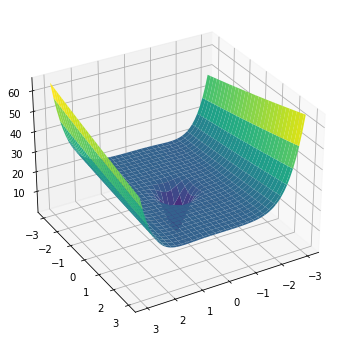

In [3]:
%matplotlib inline
xplot = np.linspace(-3, 3, 60)
yplot = np.linspace(-3, 3, 60)


Xplot = np.meshgrid(xplot,yplot)
fig = plt.figure(figsize = (8,6))
ax = fig.add_subplot(projection = '3d')

ax.plot_surface(Xplot[0], Xplot[1], func(Xplot), cmap = 'viridis')
ax.view_init(30,60)
plt.show()

In [4]:
%matplotlib inline
x = np.linspace(-3, 3, 15)
y = np.linspace(-3, 3, 15)

X = np.meshgrid(x,y)

Let us now define the "gradient descent" methods as can be found in the reference notebook (GD, GD with moentum, NAG, RMS_prop and ADAM)

In [5]:
# Vanilla GD
def gd(grad, init, n_epochs=1000, eta=10**-4, noise_strength=0, timing=False):
    start = time.time()
    #This is a simple optimizer
    params=np.array(init)
    param_traj=np.zeros([n_epochs+1,3])
    param_traj[0,]=[init[0], init[1], 0]
    v=0
    for j in range(n_epochs):
        noise=noise_strength*np.random.randn(params.size)
        v=eta*(np.array(grad(params))+noise)
        params=params-v
        param_traj[j+1,]=[params[0], params[1], time.time()-start]
    if timing == False:
        return param_traj[:,:2]
    return param_traj

# Momentum GD
def gd_with_mom(grad, init, n_epochs=5000, eta=10**-4, gamma=0.9,noise_strength=0):
    params=np.array(init)
    param_traj=np.zeros([n_epochs+1,2])
    param_traj[0,]=init
    v=0
    for j in range(n_epochs):
        noise=noise_strength*np.random.randn(params.size)
        v=gamma*v+eta*(np.array(grad(params))+noise)
        params=params-v
        param_traj[j+1,]=params
    return param_traj

# NAG
def NAG(grad, init, n_epochs=5000, eta=10**-4, gamma=0.9,noise_strength=0):
    params=np.array(init)
    param_traj=np.zeros([n_epochs+1,2])
    param_traj[0,]=init
    v=0
    for j in range(n_epochs):
        noise=noise_strength*np.random.randn(params.size)
        params_nesterov=params-gamma*v
        v=gamma*v+eta*(np.array(grad(params_nesterov))+noise)
        params=params-v
        param_traj[j+1,]=params
    return param_traj

#RMS_PROP
def rms_prop(grad, init, n_epochs=5000, eta=10**-3, beta=0.9,epsilon=10**-8,noise_strength=0):
    params=np.array(init)
    param_traj=np.zeros([n_epochs+1,2])
    param_traj[0,]=init#Import relevant packages
    grad_sq=0
    for j in range(n_epochs):
        noise=noise_strength*np.random.randn(params.size)
        g=np.array(grad(params))+noise
        grad_sq=beta*grad_sq+(1-beta)*g*g
        v=eta*np.divide(g,np.sqrt(grad_sq+epsilon))
        params= params-v
        param_traj[j+1,]=params
    return param_traj
                        
#ADAM                       
def adams(grad, init, n_epochs=5000, eta=10**-4, gamma=0.9, beta=0.99,epsilon=10**-8,noise_strength=0):
    params=np.array(init)
    param_traj=np.zeros([n_epochs+1,2])
    param_traj[0,]=init
    v=0
    grad_sq=0
    for j in range(n_epochs):
        noise=noise_strength*np.random.randn(params.size)
        g=np.array(grad(params))+noise
        v=gamma*v+(1-gamma)*g
        grad_sq=beta*grad_sq+(1-beta)*g*g
        v_hat=v/(1-gamma)
        grad_sq_hat=grad_sq/(1-beta)
        params=params-eta*np.divide(v_hat,np.sqrt(grad_sq_hat+epsilon))
        param_traj[j+1,]=params
    return param_traj

We may assume that the iteration time is constant for each step in the process, and simply divide the time needed to finish the function path by the number of epochs to get a single epoch time. 

This approximation is supposed to be always valid, and we checked explicitly it in the GD case, plotting the trend of time during minimization process for a random choosen point.

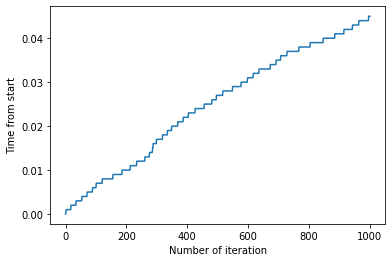

In [6]:
Xf = gd(grad, [-3, 3], timing = True) #returning x,y,t for each iteration
#print(Xf)
plt.plot(Xf[:,2])
plt.xlabel("Number of iteration")
plt.ylabel("Time from start")
plt.show()

Here we define a function returning the results needed for various functions.  Basically a wrapper for the previous minimization approaches. The function computes the "minimitazion path" for each starting point in the initial 15x15 grid and returns the mean value for the "energy" at each iteration. The total running time is also returned.

In [7]:
def minResults(x,y,eta,epochs,minfunc, func, grad):
    Results = pd.DataFrame()
    count = 0
    start = time.time()
    for i in tqdm(x, leave = False):
        count += 1
        #print(count)
        for j in tqdm(y, leave = False): 
            Results[str(i) + " " + str(j)] = func(minfunc(grad, np.array([i,j]), eta = eta, n_epochs = epochs).T)
    end = time.time()
    return Results.mean(axis = 1), (end-start)/epochs

In [8]:
eta = [0.01, 0.001, 0.0001] #we try different learning rates

NOTE: the process of minimization for all points of the grid takes some time. In order to visualize the process we used loading bars from package tqdm. These bars may not be displayed correctly opening the notebook without running the cells

In [9]:
Results_gd = pd.DataFrame()
for e in eta:
    print('Minimizing with eta = ' , e)
    Results_gd['eta = ' + str(e)], time_per_iteration = minResults(x, y, e, 5000, gd, func, grad)
    Results_gd['eta = ' + str(e) + '_time'] = np.arange(5001)*time_per_iteration/225
    print('done!\n')
    

Minimizing with eta =  0.01


  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

done!

Minimizing with eta =  0.001


  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

done!

Minimizing with eta =  0.0001


  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

done!



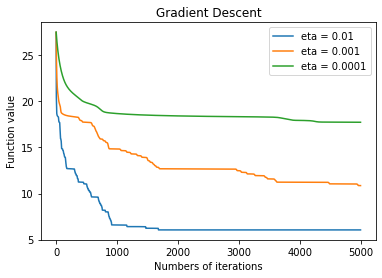

In [10]:
Results_gd.loc[:, ::2].plot()
plt.xlabel("Numbers of iterations")
plt.ylabel("Function value")
plt.title("Gradient Descent")
plt.show()
#Results_gd

The best $\eta$ selected for this case is $\eta$ = 0.001, as it converges to a smaller value, closer to the actual minimum

In [11]:
Results_gd_mom = pd.DataFrame()
for e in eta:
    print('Minimizing with eta = ' , e)
    Results_gd_mom['eta = ' + str(e)], time_per_iteration = minResults(x, y, e, 5000, gd_with_mom, func, grad)
    Results_gd_mom['eta = ' + str(e) + '_time'] = np.arange(5001)*time_per_iteration/225
    print('done!\n')

Minimizing with eta =  0.01


  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

done!

Minimizing with eta =  0.001


  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

done!

Minimizing with eta =  0.0001


  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

done!



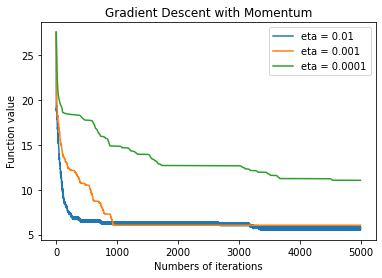

In [12]:
Results_gd_mom.loc[:, ::2].plot()
plt.xlabel("Numbers of iterations")
plt.ylabel("Function value")
plt.title("Gradient Descent with Momentum")
plt.show()
# Results_gd_mom

In [13]:
Results_NAG = pd.DataFrame()
for e in eta:
    print('Minimizing with eta = ' , e)
    Results_NAG['eta = ' + str(e)], time_per_iteration = minResults(x, y, e, 5000, NAG, func, grad)
    Results_NAG['eta = ' + str(e) + '_time'] = np.arange(5001)*time_per_iteration/225
    print('done!\n')

Minimizing with eta =  0.01


  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

done!

Minimizing with eta =  0.001


  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

done!

Minimizing with eta =  0.0001


  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

done!



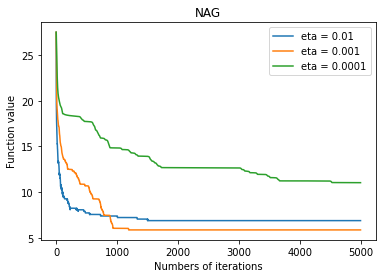

In [14]:
Results_NAG.loc[:, ::2].plot()
plt.xlabel("Numbers of iterations")
plt.ylabel("Function value")
plt.title("NAG")

plt.show()
# Results_NAG

In [15]:
Results_rms = pd.DataFrame()
for e in eta:
    print('Minimizing with eta = ' , e)
    Results_rms['eta = ' + str(e)], time_per_iteration = minResults(x, y, e, 5000, rms_prop, func, grad)
    Results_rms['eta = ' + str(e) + '_time'] = np.arange(5001)*time_per_iteration/225
    print('done!\n')

Minimizing with eta =  0.01


  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

done!

Minimizing with eta =  0.001


  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

done!

Minimizing with eta =  0.0001


  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

done!



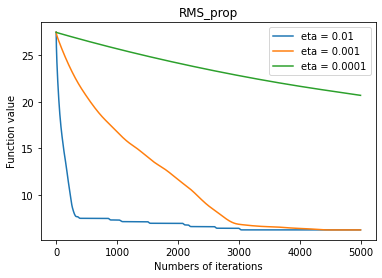

In [16]:
%matplotlib inline
Results_rms.loc[:, ::2].plot()
plt.xlabel("Numbers of iterations")
plt.ylabel("Function value")
plt.title("RMS_prop")
plt.show()
# Results_rms

In [17]:
Results_adams = pd.DataFrame()
for e in eta:
    print('Minimizing with eta = ' , e)
    Results_adams['eta = ' + str(e)], time_per_iteration = minResults(x, y, e, 5000, adams, func, grad)
    Results_adams['eta = ' + str(e) + '_time'] = np.arange(5001)*time_per_iteration/225
    print('done!\n')

Minimizing with eta =  0.01


  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

done!

Minimizing with eta =  0.001


  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

done!

Minimizing with eta =  0.0001


  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

done!



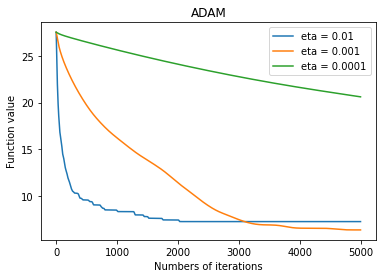

In [18]:
%matplotlib inline
Results_adams.loc[:, ::2].plot()
plt.xlabel("Numbers of iterations")
plt.ylabel("Function value")
plt.title("ADAM")
plt.show()
# Results_adams

The best $\eta$ for every algotithm are choosen as the ones reaching a fast and stable convergence: 

GD: 0.01

GD_mom: 0.001

NAG: 0.001

RMS_prop: 0.01

ADAM: 0.001

Now we plot the best results for every algorithm with the actual CPU time used. 

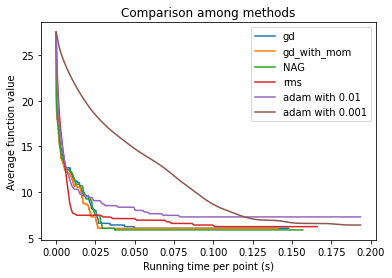

In [31]:
%matplotlib inline
plt.plot(Results_gd["eta = 0.01_time"], Results_gd["eta = 0.01"], label = "gd")
plt.plot(Results_gd_mom["eta = 0.001_time"], Results_gd_mom["eta = 0.001"], label = "gd_with_mom")
plt.plot(Results_NAG["eta = 0.001_time"], Results_NAG["eta = 0.001"], label = "NAG")
plt.plot(Results_rms["eta = 0.01_time"], Results_rms["eta = 0.01"], label = "rms")
plt.plot(Results_adams["eta = 0.01_time"], Results_adams["eta = 0.01"], label = "adam with 0.01")
plt.plot(Results_adams["eta = 0.01_time"], Results_adams["eta = 0.001"], label = "adam with 0.001")
plt.ylabel("Average function value")
plt.xlabel("Running time per point (s)")

plt.title("Comparison among methods")
plt.legend()
plt.show()

The different minimization algorithms show a similar behaviour when considered over multiple initial points. 

Moreover, the rms one reaches more often a local minimum, and has a medium value typically higher than the other ones. 


On the other hand, the adam algorithm seems not to converge in only 2000 iterations.

# Comparison GD, Adam, RMS_prop: 

We can notice that the GD algorithm seems faster on the first steps as it follows the steep descent. 
On the other hand, the Adam and RMS prop algorithms typically have the same path but ADAM somehow stops before - maybe due to the change in the friction coefficient, while RMS prop manages to route back towards the global minimum within 50k epochs.

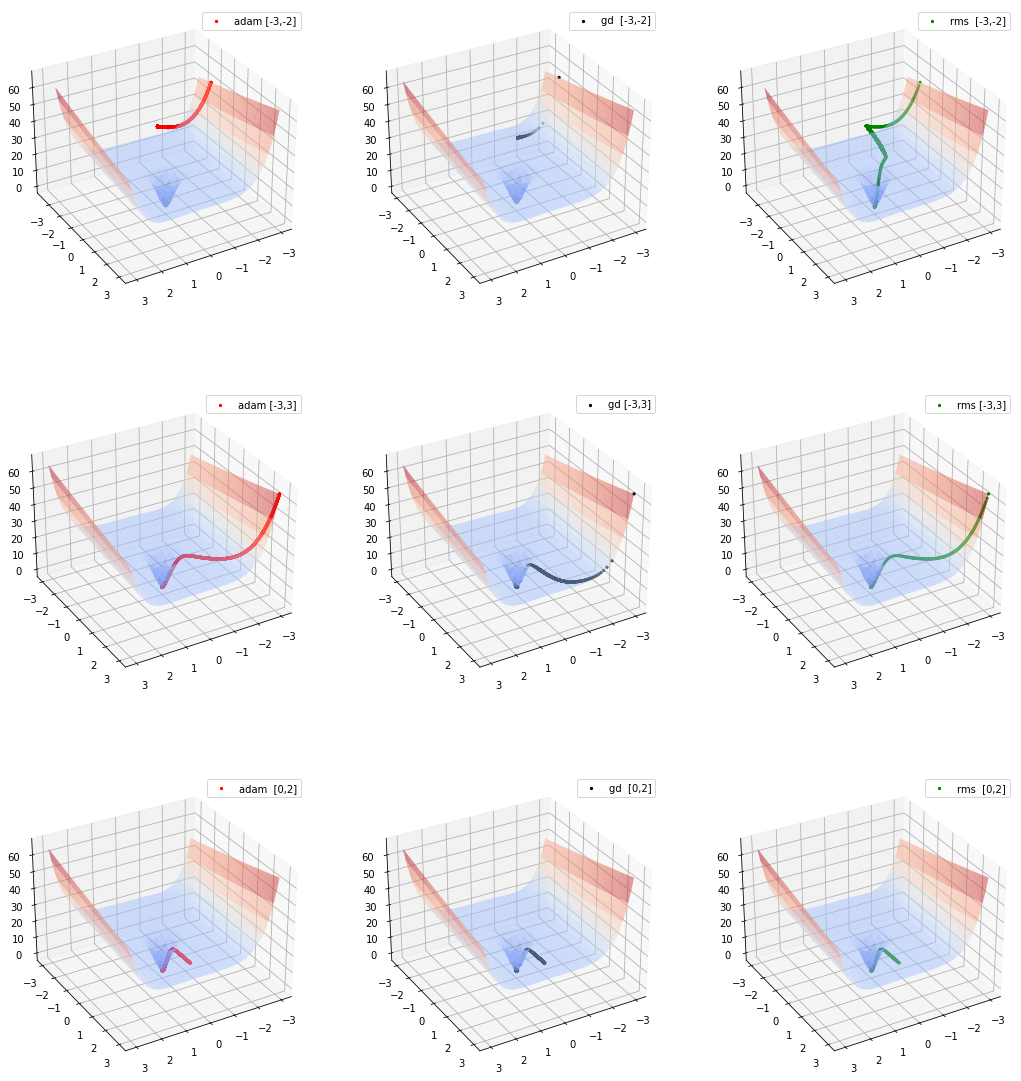

In [30]:
%matplotlib inline
xplot = np.linspace(-3, 3, 60)
yplot = np.linspace(-3, 3, 60)


Xplot = np.meshgrid(xplot,yplot)
fig  = plt.figure(figsize=(18,20))

ax = fig.add_subplot(3, 3, 1, projection='3d')
ax2= fig.add_subplot(3,3,2, projection = '3d')
ax3= fig.add_subplot(3,3,3, projection = '3d')

ax4 = fig.add_subplot(3, 3, 4, projection='3d')
ax5= fig.add_subplot(3,3,5, projection = '3d')
ax6= fig.add_subplot(3,3,6, projection = '3d')


ax7= fig.add_subplot(3, 3,7, projection='3d')
ax8= fig.add_subplot(3,3,8, projection = '3d')
ax9= fig.add_subplot(3,3,9, projection = '3d')


ax.plot_surface(Xplot[0], Xplot[1], func(Xplot), cmap = 'coolwarm', alpha = 0.5)
ax.view_init(30,60)
ax2.plot_surface(Xplot[0], Xplot[1], func(Xplot), cmap = 'coolwarm', alpha = 0.5)
ax2.view_init(30,60)
ax3.plot_surface(Xplot[0], Xplot[1], func(Xplot), cmap = 'coolwarm', alpha = 0.5)
ax3.view_init(30,60)
ax4.plot_surface(Xplot[0], Xplot[1], func(Xplot), cmap = 'coolwarm', alpha = 0.5)
ax4.view_init(30,60)
ax5.plot_surface(Xplot[0], Xplot[1], func(Xplot), cmap = 'coolwarm', alpha = 0.5)
ax5.view_init(30,60)
ax6.plot_surface(Xplot[0], Xplot[1], func(Xplot), cmap = 'coolwarm', alpha = 0.5)
ax6.view_init(30,60)
ax7.plot_surface(Xplot[0], Xplot[1], func(Xplot), cmap = 'coolwarm', alpha = 0.5)
ax7.view_init(30,60)
ax8.plot_surface(Xplot[0], Xplot[1], func(Xplot), cmap = 'coolwarm', alpha = 0.5)
ax8.view_init(30,60)
ax9.plot_surface(Xplot[0], Xplot[1], func(Xplot), cmap = 'coolwarm', alpha = 0.5)
ax9.view_init(30,60)


P1_adam = adams(grad, [-3,-2], n_epochs=50000, eta=0.001, noise_strength=0,)
ax.scatter(P1_adam[:,0], P1_adam[:,1], func(P1_adam.T), marker = '.', color = 'red', linewidth =  1, label = "adam [-3,-2]")
P1_gd = gd(grad, [-3,-2], n_epochs=50000, eta=0.01, noise_strength=0,)
ax2.scatter(P1_gd[:,0], P1_gd[:,1], func(P1_gd.T), marker = '.', color = 'black', linewidth =  1, label = "gd  [-3,-2]")
P1_rms = rms_prop(grad, [-3,-2], n_epochs=50000, eta=0.01, noise_strength=0,)
ax3.scatter(P1_rms[:,0], P1_rms[:,1], func(P1_rms.T), marker = '.', color = 'green', linewidth =  1, label = "rms  [-3,-2]")


P2_adam = adams(grad, [-3,3], n_epochs=50000, eta=0.001, noise_strength=0,)
ax4.scatter(P2_adam[:,0], P2_adam[:,1], func(P2_adam.T), marker = '.', color = 'red', linewidth =  1, label = "adam [-3,3]")
P2_gd = gd(grad, [-3,3], n_epochs=50000, eta=0.01, noise_strength=0,)
ax5.scatter(P2_gd[:,0], P2_gd[:,1], func(P2_gd.T), marker = '.', color = 'black', linewidth =  1, label = "gd [-3,3]")
P2_rms = rms_prop(grad, [-3,3], n_epochs=50000, eta=0.01, noise_strength=0,)
ax6.scatter(P2_rms[:,0], P2_rms[:,1], func(P2_rms.T), marker = '.', color = 'green', linewidth =  1, label = "rms [-3,3]")

P3_adam = adams(grad, [0,2], n_epochs=50000, eta=0.001, noise_strength=0,)
ax7.scatter(P3_adam[:,0], P3_adam[:,1], func(P3_adam.T), marker = '.', color = 'red', linewidth =  1, label = "adam  [0,2]")
P3_gd = gd(grad, [0,2], n_epochs=50000, eta=0.01, noise_strength=0,)
ax8.scatter(P3_gd[:,0], P3_gd[:,1], func(P3_gd.T), marker = '.', color = 'black', linewidth =  1, label = "gd  [0,2]")
P3_rms = rms_prop(grad, [0,2], n_epochs=50000, eta=0.01, noise_strength=0,)
ax9.scatter(P3_rms[:,0], P3_rms[:,1], func(P3_rms.T), marker = '.', color = 'green', linewidth =  1, label = "rms  [0,2]")


ax.legend()
ax2.legend()
ax3.legend()
ax4.legend()
ax5.legend()
ax6.legend()
ax7.legend()
ax8.legend()
ax9.legend()

plt.show()

### Ex 2

Now we study the behaviour of ADAM algorithm for a "energy" function that present a global minimum but also a lot of local minima, in which tha algorithm could wrongly stop.

In [22]:
def func_2(X, q = 6):
    return 1 + 0.5*q* (X[0]**2+X[1]**2) - np.cos(2*np.pi*(X[0]*X[1]-X[1]**2))

def gradx_2(X,q = 6):
    return q*X[0] + 2*np.pi*X[1]*np.sin(2*np.pi*(X[0]*X[1]-X[1]**2))

def grady_2(X, q = 0.1):
    return q*X[1]+ 2*np.pi*(X[0]-2*X[1])*np.sin(2*np.pi*(X[0]*X[1]-X[1]**2))

def grad_2(X):
    return [gradx_2(X), grady_2(X)]

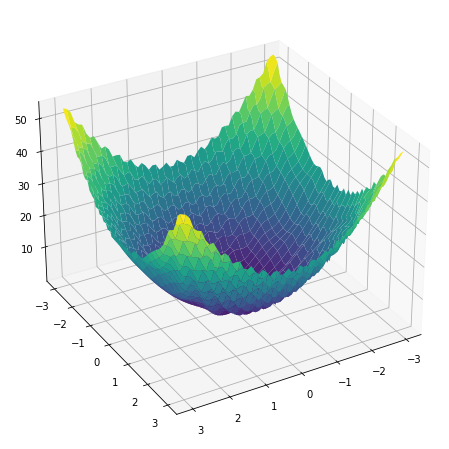

In [23]:
%matplotlib inline
xplot = np.linspace(-3, 3, 60)
yplot = np.linspace(-3, 3, 60)


Xplot = np.meshgrid(xplot,yplot)
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(projection = '3d')


ax.plot_surface(Xplot[0], Xplot[1], func_2(Xplot), cmap = 'viridis')
ax.view_init(30,60)
plt.show()

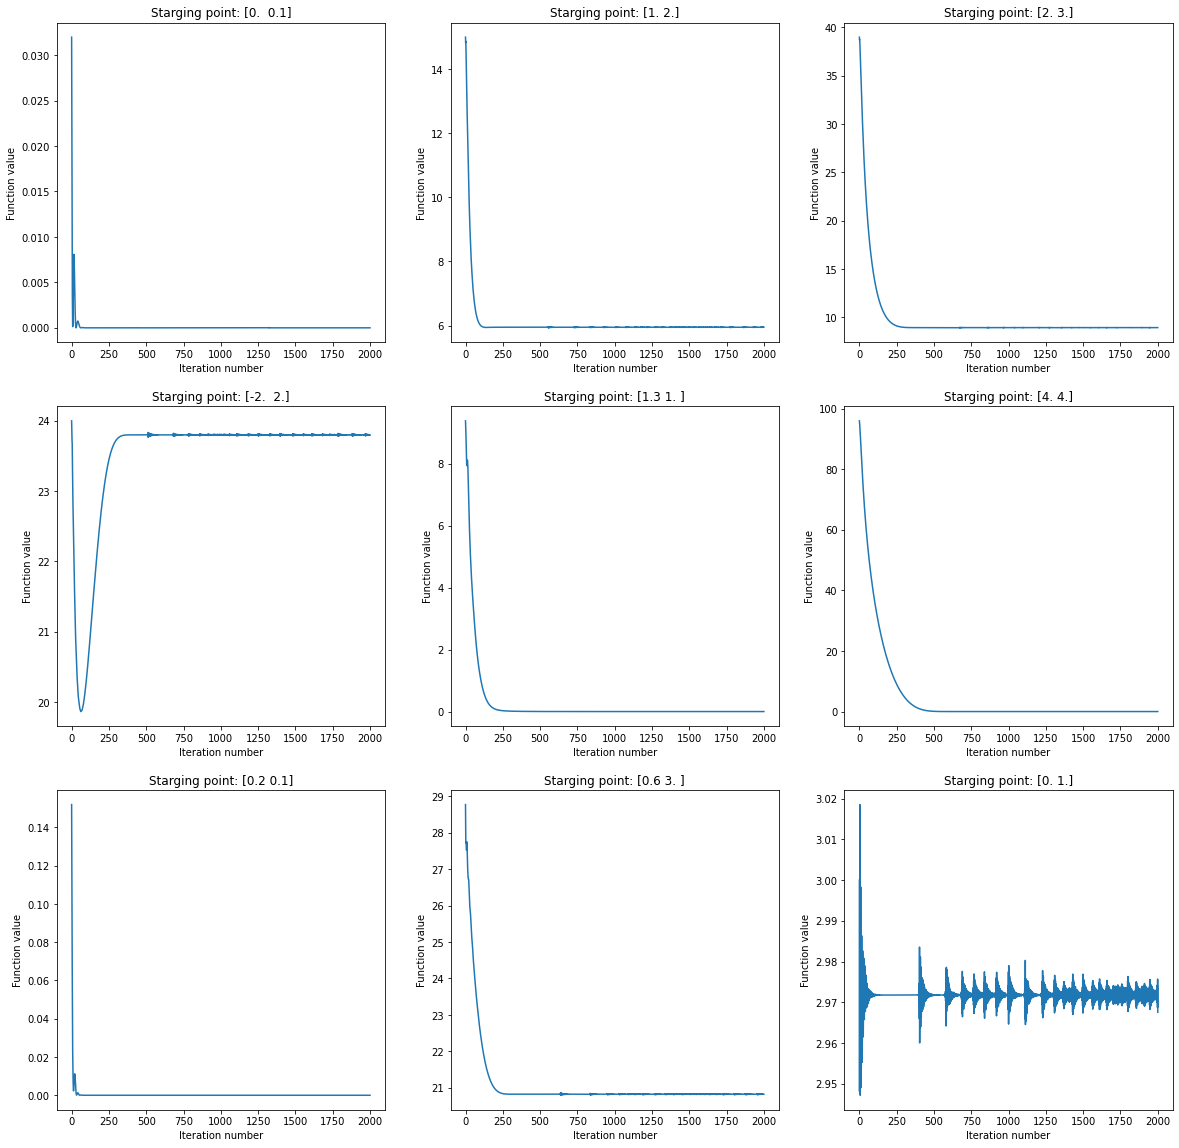

In [25]:
fig, ax = plt.subplots(3,3, figsize = (20,20))

pts_array = np.array([[0.,0.1], [1,2], [2,3], [-2,2], [1.3, 1], [4,4], [0.2, 0.1], [0.6, 3], [0,1]])
epochs = 2000
for i in range(3):
    for j in range(3):
        
        ax[i,j].plot(np.arange(epochs+1), func_2( adams(grad_2, pts_array[3*i+j], n_epochs = epochs,eta = 0.01).T) )
        ax[i,j].set_title("Starging point: "+ str( pts_array[3*i+j]))
        ax[i,j].set_xlabel("Iteration number")
        ax[i,j].set_ylabel("Function value")

plt.show()

As shown in the previous cases, the ADAM algorithm does not manage to converge in all cases. 
In the last one, in particular, it keeps bouncing between some points into the same local minima. 
Clearly this algorithm, for the second function tried, is not sufficiently stable to be relied on.

The [-2,2] case is the most unfortunate one. It starts decreasing, but then falls into a local minimum and gets stuck over there.

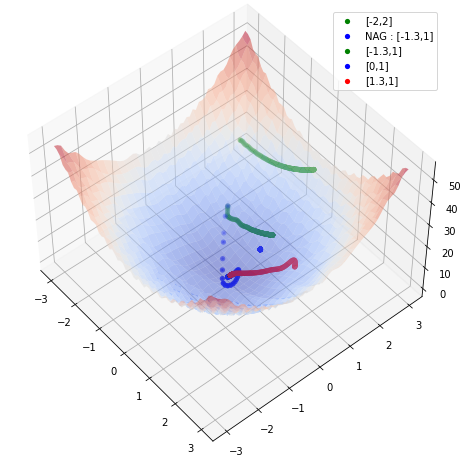

In [26]:
%matplotlib inline
xplot = np.linspace(-3, 3, 60)
yplot = np.linspace(-3, 3, 60)


Xplot = np.meshgrid(xplot,yplot)
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(projection = '3d')


ax.plot_surface(Xplot[0], Xplot[1], func_2(Xplot), cmap = 'coolwarm', alpha = 0.5)
ax.view_init(50,320)
#plt.show()

oneGD = adams(grad_2, [-2,2], n_epochs=250, eta=0.01, noise_strength=0,)
ax.scatter(oneGD[:,0], oneGD[:,1], func_2(oneGD.T), marker = '.', color = 'green', linewidth = 3, label = "[-2,2]")

 #NAG here is the only algorothm managing to reach the global minimun
oneGD = NAG(grad_2, [-1.3,1], n_epochs=250, eta=0.01, noise_strength=0,)
ax.scatter(oneGD[:,0], oneGD[:,1], func_2(oneGD.T), marker = '.', color = 'blue', linewidth = 3, label = "NAG : [-1.3,1]")


oneGD = adams(grad_2, [-1.3,1], n_epochs=250, eta=0.01, noise_strength=0,)
ax.scatter(oneGD[:,0], oneGD[:,1], func_2(oneGD.T), marker = '.', color = 'green', linewidth = 3, label = "[-1.3,1]")


oneGD = adams(grad_2, [0,1], n_epochs=2000, eta=0.01, noise_strength=0,) #local minimum
ax.scatter(oneGD[:,0], oneGD[:,1], func_2(oneGD.T), marker = '.', color = 'blue', linewidth = 3, label = "[0,1]")


oneGD = adams(grad_2, [1.3,1], n_epochs=20000, eta=0.01, noise_strength=0,)
ax.scatter(oneGD[:,0], oneGD[:,1], func_2(oneGD.T), marker = '.', color = 'red', linewidth = 3, label = "[1.3,1]")

ax.legend()
plt.show()

Definitely ADAM has not a stable behaviour with this function with multiple local minima. 
Adam does not manage to reach the global minimum for various initial points